In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WISDMData.txt to WISDMData.txt


In [ ]:
file_name = "WISDMData.txt"

# Load the raw data
with open(file_name) as file:
    data = file.readlines()

# Parse the data into a DataFrame
parsed_data = []
for line in data:
    try:
        parts = line.strip().split(',')
        if len(parts) == 6:
            user_id, activity, timestamp, x, y, z = parts
            parsed_data.append([int(user_id), activity, int(timestamp), float(x), float(y), float(z)])
    except:
        continue

df = pd.DataFrame(parsed_data, columns=['User', 'Activity', 'Timestamp', 'X', 'Y', 'Z'])

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Summary of the dataset
print(df.info())
print(df.describe())

User         0
Activity     0
Timestamp    0
X            0
Y            0
Z            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User       0 non-null      object
 1   Activity   0 non-null      object
 2   Timestamp  0 non-null      object
 3   X          0 non-null      object
 4   Y          0 non-null      object
 5   Z          0 non-null      object
dtypes: object(6)
memory usage: 124.0+ bytes
None
       User Activity Timestamp    X    Y    Z
count     0        0         0    0    0    0
unique    0        0         0    0    0    0
top     NaN      NaN       NaN  NaN  NaN  NaN
freq    NaN      NaN       NaN  NaN  NaN  NaN


In [ ]:
label_encoder = LabelEncoder()
df['Activity'] = label_encoder.fit_transform(df['Activity'])
activity_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(activity_mapping)

{}


In [ ]:
print(df.shape)
print(df.head())

(0, 6)
Empty DataFrame
Columns: [User, Activity, Timestamp, X, Y, Z]
Index: []


In [ ]:
print(df[['X', 'Y', 'Z']].isnull().sum())  # Check for NaNs
print(df[['X', 'Y', 'Z']].info())  # Check data types

X    0
Y    0
Z    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       0 non-null      object
 1   Y       0 non-null      object
 2   Z       0 non-null      object
dtypes: object(3)
memory usage: 124.0+ bytes
None


In [ ]:
with open(file_name) as file:
    for i in range(10):  # Print first 10 lines
        print(file.readline())

33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;

33,Jogging,49106062271000,5.012288,11.264028,0.95342433;

33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;

33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172;

33,Jogging,49106332290000,-1.1849703,12.108489,7.205164;

33,Jogging,49106442306000,1.3756552,-2.4925237,-6.510526;

33,Jogging,49106542312000,-0.61291564,10.56939,5.706926;

33,Jogging,49106652389000,-0.50395286,13.947236,7.0553403;

33,Jogging,49106762313000,-8.430995,11.413852,5.134871;

33,Jogging,49106872299000,0.95342433,1.3756552,1.6480621;



In [ ]:
parsed_data = []
with open(file_name) as file:
    for line in file:
        try:
            # Remove semicolon and strip whitespace
            line = line.strip().strip(';')
            parts = line.split(',')

            # Check if all six fields are present
            if len(parts) != 6:
                print(f"Skipping line due to incorrect format: {line}")
                continue

            # Extract fields and handle missing values
            user_id = int(parts[0])  # Convert to integer
            activity = parts[1]  # Keep as string
            timestamp = int(parts[2])  # Convert to integer

            # Convert to float, using 0.0 if the value is missing
            x = float(parts[3]) if parts[3].strip() else 0.0
            y = float(parts[4]) if parts[4].strip() else 0.0
            z = float(parts[5]) if parts[5].strip() else 0.0

            # Append the parsed row to the list
            parsed_data.append([user_id, activity, timestamp, x, y, z])

        except ValueError as e:
            print(f"Error processing line: {line} - {e}")

Streaming output truncated to the last 5000 lines.
Skipping line due to incorrect format: 21,Jogging,117437991461000,0.27,10.76,-2.53,
Skipping line due to incorrect format: 21,Jogging,117438031561000,9.58,18.24,10.04,
Skipping line due to incorrect format: 21,Jogging,117438071448000,2.98,4.63,-1.08,
Skipping line due to incorrect format: 21,Jogging,117438122076000,-7.35,5.6,2.03,
Skipping line due to incorrect format: 21,Jogging,117438161505000,1.88,3.45,1.18,
Skipping line due to incorrect format: 21,Jogging,117438207404000,2.45,-3.3,-1.23,
Skipping line due to incorrect format: 21,Jogging,117438291632000,4.37,15.89,0.23,
Skipping line due to incorrect format: 21,Jogging,117438331580000,-9.47,20.04,4.25,
Skipping line due to incorrect format: 21,Jogging,117438371436000,5.86,19.7,12.41,
Skipping line due to incorrect format: 21,Jogging,117438411932000,3.06,8.85,4.52,
Skipping line due to incorrect format: 21,Jogging,117438491553000,-4.6,-11.18,-6.21,
Skipping line due to incorrect for

In [ ]:
df = pd.DataFrame(parsed_data, columns=['User', 'Activity', 'Timestamp', 'X', 'Y', 'Z'])
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086466 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   User       1086466 non-null  int64  
 1   Activity   1086466 non-null  object 
 2   Timestamp  1086466 non-null  int64  
 3   X          1086466 non-null  float64
 4   Y          1086466 non-null  float64
 5   Z          1086466 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.7+ MB
None
   User Activity       Timestamp         X          Y         Z
0    33  Jogging  49105962326000 -0.694638  12.680544  0.503953
1    33  Jogging  49106062271000  5.012288  11.264028  0.953424
2    33  Jogging  49106112167000  4.903325  10.882658 -0.081722
3    33  Jogging  49106222305000 -0.612916  18.496431  3.023717
4    33  Jogging  49106332290000 -1.184970  12.108489  7.205164


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['X', 'Y', 'Z']] = scaler.fit_transform(df[['X', 'Y', 'Z']])
print(df[['X', 'Y', 'Z']].head())

          X         Y         Z
0 -0.197600  0.806332  0.022317
1  0.632344  0.596159  0.116722
2  0.616498  0.539575 -0.100695
3 -0.185716  1.669251  0.551557
4 -0.268908  0.721454  1.429808


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Activity'] = le.fit_transform(df['Activity'])
print(df['Activity'].head())

0    1
1    1
2    1
3    1
4    1
Name: Activity, dtype: int64


In [ ]:
df['Time_diff'] = df['Timestamp'].diff().fillna(0)  # Calculate time difference

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['X', 'Y', 'Z']]
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27162/27162 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.5904 - loss: 1.0776 - val_accuracy: 0.6246 - val_loss: 0.9816
Epoch 2/10
27162/27162 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.6245 - loss: 0.9803 - val_accuracy: 0.6269 - val_loss: 0.9730
Epoch 3/10
27162/27162 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.6273 - loss: 0.9706 - val_accuracy: 0.6295 - val_loss: 0.9659
Epoch 4/10
27162/27162 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.6280 - loss: 0.9671 - val_accuracy: 0.6311 - val_loss: 0.9594
Epoch 5/10
27162/27162 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.6308 - loss: 0.9616 - val_accuracy: 0.6320 - val_loss: 0.9578
Epoch 6/10
27162/27162 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.6303 - loss: 0.9599 - val_accuracy: 0.6328 - val_loss: 0.9562
Epoch 7/10
27162/27162 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6304 - loss: 0.9597 - val_accuracy: 0.6329 - val_loss: 0.9537
Epoch 8/10
27162/27162 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.6310 - lo

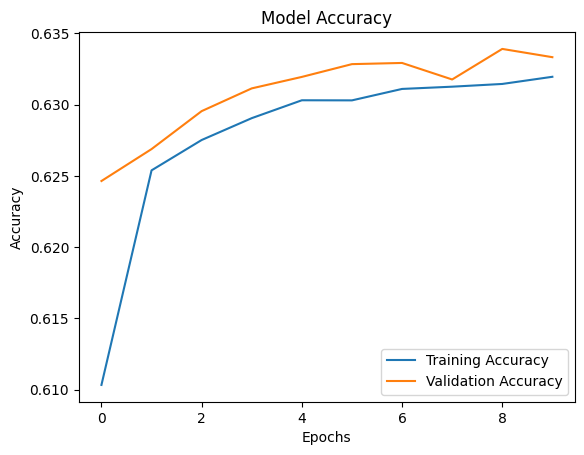

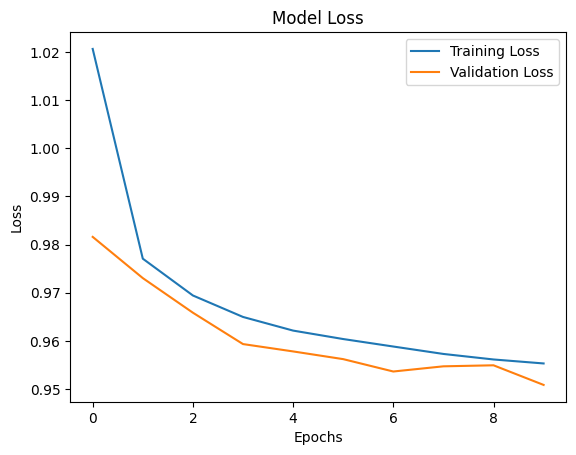

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare data (features and labels)
X = df[['X', 'Y', 'Z']]
y = df['Activity']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with ReLU activation
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(len(y.unique()), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()